In [92]:
import numpy as np
import plotly as py
import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import polyfit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from mpl_toolkits.mplot3d import Axes3D

In [110]:
data = pd.read_csv("../Analysis Data/beauty.csv")
cdata = data
data = data.dropna()
print(data)

     tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7 

In [111]:
results = smf.ols('courseevaluation ~ btystdave', data=data).fit()
wyn=results.params

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        08:07:55   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

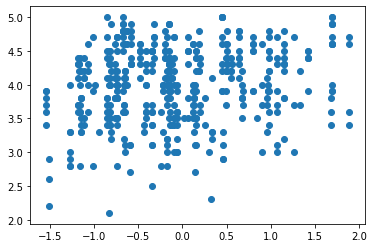

In [112]:
plt.scatter(data['btystdave'], data['courseevaluation'])

In [113]:
data['courseeval_pred']=results.predict()
data['residuals']=data['courseevaluation']-data['courseeval_pred']

print(data)

     tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7 

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning:


The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



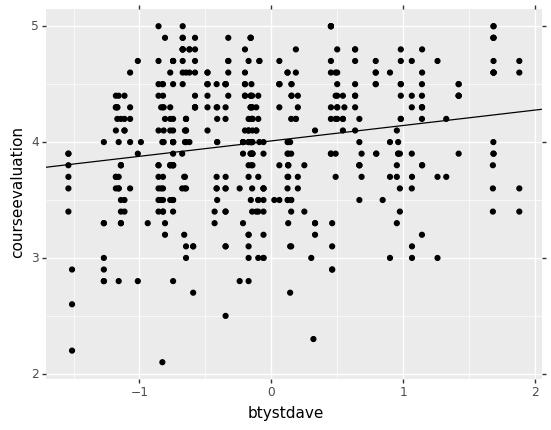

<ggplot: (-9223371921874595482)>

In [115]:
fig2=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=data)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))

fig2

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\jdsda\.conda\envs\VR\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



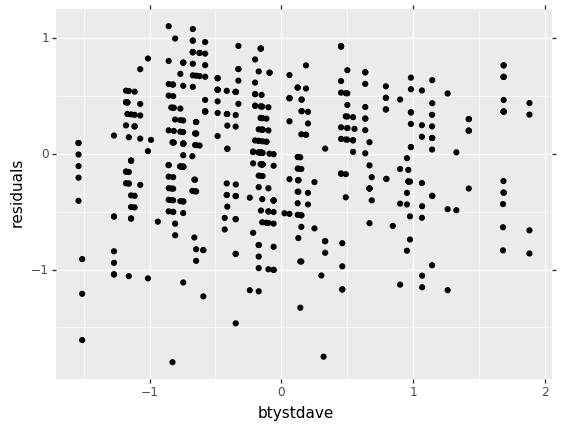

<ggplot: (114980180302)>

In [117]:
fig2_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=data)
      +p9.geom_point())
fig2_res

In [122]:
results = smf.ols('courseevaluation ~ btystdave + age', data=data).fit()
wyn=results.params
data['courseeval_pred']=results.predict()
data['residuals']=data['courseevaluation']-data['courseeval_pred']

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.530
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           0.000230
Time:                        08:15:20   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             756.6
Df Residuals:                     460   BIC:                             769.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9962      0.133     30.072      0.000       3.735       4.257
btystdave      0.1341      0.034      3.973      0.000       0.068       0.200
age            0.0003      0.003      0.106      0.916      -0.005       0.006
==============================================================================
Omnibus:                       15.449   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.464
Skew:                          -0.454   Prob(JB):                     0.000266
Kurtosis:                       2.832   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

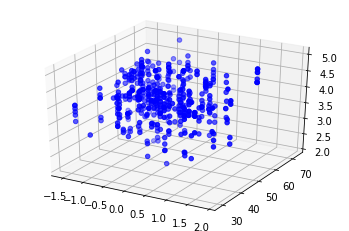

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['btystdave'], data['age'], data['courseevaluation'], c='blue')

In [125]:
X = data[['btystdave', 'age', 'courseevaluation']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

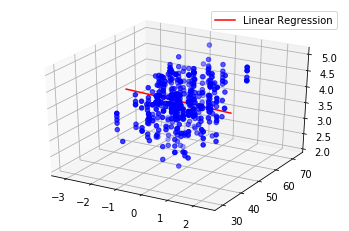

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['btystdave'], data['age'], data['courseevaluation'], c='blue')
ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()

plt.show()